In [14]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [15]:
iris = load_iris()
X1 = pd.DataFrame(iris.data, columns=iris.feature_names)
y1 = iris.target

wine = load_wine()
X2 = pd.DataFrame(wine.data, columns=wine.feature_names)
y2 = wine.target

In [16]:
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)
X2_scaled = scaler.fit_transform(X2)

models = {
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-score": f1_score(y_test, y_pred, average='weighted')
    }

In [17]:
# Holdout Validation

holdout_results = []

for dataset_name, (X, y) in {"Iris": (X1_scaled, y1), "Wine": (X2_scaled, y2)}.items():
    for split, test_size in {"80/20": 0.2, "66.6/33.3": 0.333}.items():
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

        for model_name, model in models.items():
            scores = evaluate_model(model, X_train, X_test, y_train, y_test)
            holdout_results.append({
                "Dataset": dataset_name,
                "Split": split,
                "Model": model_name,
                **scores
            })

holdout_df = pd.DataFrame(holdout_results)
print("\n=== Holdout Method Results ===")
print(holdout_df)


=== Holdout Method Results ===
   Dataset      Split          Model  Accuracy  Precision    Recall  F1-score
0     Iris      80/20    Naive Bayes  0.966667   0.969697  0.966667  0.966583
1     Iris      80/20            KNN  0.933333   0.944444  0.933333  0.932660
2     Iris      80/20  Decision Tree  0.933333   0.933333  0.933333  0.933333
3     Iris  66.6/33.3    Naive Bayes  0.920000   0.923649  0.920000  0.919722
4     Iris  66.6/33.3            KNN  0.920000   0.935238  0.920000  0.918877
5     Iris  66.6/33.3  Decision Tree  0.940000   0.949000  0.940000  0.939529
6     Wine      80/20    Naive Bayes  0.972222   0.974359  0.972222  0.972263
7     Wine      80/20            KNN  0.972222   0.974747  0.972222  0.972369
8     Wine      80/20  Decision Tree  0.944444   0.951389  0.944444  0.944961
9     Wine  66.6/33.3    Naive Bayes  0.966667   0.969231  0.966667  0.966456
10    Wine  66.6/33.3            KNN  0.950000   0.957895  0.950000  0.950476
11    Wine  66.6/33.3  Decision 

In [18]:
# Cross-Validation

cv_results = []

for dataset_name, (X, y) in {"Iris": (X1_scaled, y1), "Wine": (X2_scaled, y2)}.items():
    for folds in [5, 10]:
        kf = KFold(n_splits=folds, shuffle=True, random_state=42)

        for model_name, model in models.items():
            scores = cross_validate(model, X, y, cv=kf,
                                    scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'])
            
            cv_results.append({
                "Dataset": dataset_name,
                "CV_Folds": folds,
                "Model": model_name,
                "Accuracy": np.mean(scores['test_accuracy']),
                "Precision": np.mean(scores['test_precision_weighted']),
                "Recall": np.mean(scores['test_recall_weighted']),
                "F1-score": np.mean(scores['test_f1_weighted'])
            })

cv_df = pd.DataFrame(cv_results)
print("\n=== Cross-Validation Results ===")
print(cv_df)


=== Cross-Validation Results ===
   Dataset  CV_Folds          Model  Accuracy  Precision    Recall  F1-score
0     Iris         5    Naive Bayes  0.960000   0.963879  0.960000  0.959916
1     Iris         5            KNN  0.960000   0.962187  0.960000  0.959797
2     Iris         5  Decision Tree  0.953333   0.958657  0.953333  0.953185
3     Iris        10    Naive Bayes  0.960000   0.967619  0.960000  0.960287
4     Iris        10            KNN  0.953333   0.960254  0.953333  0.952893
5     Iris        10  Decision Tree  0.940000   0.948571  0.940000  0.940219
6     Wine         5    Naive Bayes  0.983016   0.983844  0.983016  0.982961
7     Wine         5            KNN  0.949365   0.956877  0.949365  0.949228
8     Wine         5  Decision Tree  0.876349   0.882125  0.876349  0.876774
9     Wine        10    Naive Bayes  0.977778   0.981411  0.977778  0.977469
10    Wine        10            KNN  0.971895   0.977178  0.971895  0.972372
11    Wine        10  Decision Tree  0.898

In [19]:
# Comparison of Holdout vs Cross-Validation
print("\n===== FINAL COMPARISON =====")
print(pd.concat([holdout_df, cv_df], ignore_index=True))



===== FINAL COMPARISON =====
   Dataset      Split          Model  Accuracy  Precision    Recall  F1-score  \
0     Iris      80/20    Naive Bayes  0.966667   0.969697  0.966667  0.966583   
1     Iris      80/20            KNN  0.933333   0.944444  0.933333  0.932660   
2     Iris      80/20  Decision Tree  0.933333   0.933333  0.933333  0.933333   
3     Iris  66.6/33.3    Naive Bayes  0.920000   0.923649  0.920000  0.919722   
4     Iris  66.6/33.3            KNN  0.920000   0.935238  0.920000  0.918877   
5     Iris  66.6/33.3  Decision Tree  0.940000   0.949000  0.940000  0.939529   
6     Wine      80/20    Naive Bayes  0.972222   0.974359  0.972222  0.972263   
7     Wine      80/20            KNN  0.972222   0.974747  0.972222  0.972369   
8     Wine      80/20  Decision Tree  0.944444   0.951389  0.944444  0.944961   
9     Wine  66.6/33.3    Naive Bayes  0.966667   0.969231  0.966667  0.966456   
10    Wine  66.6/33.3            KNN  0.950000   0.957895  0.950000  0.950476  

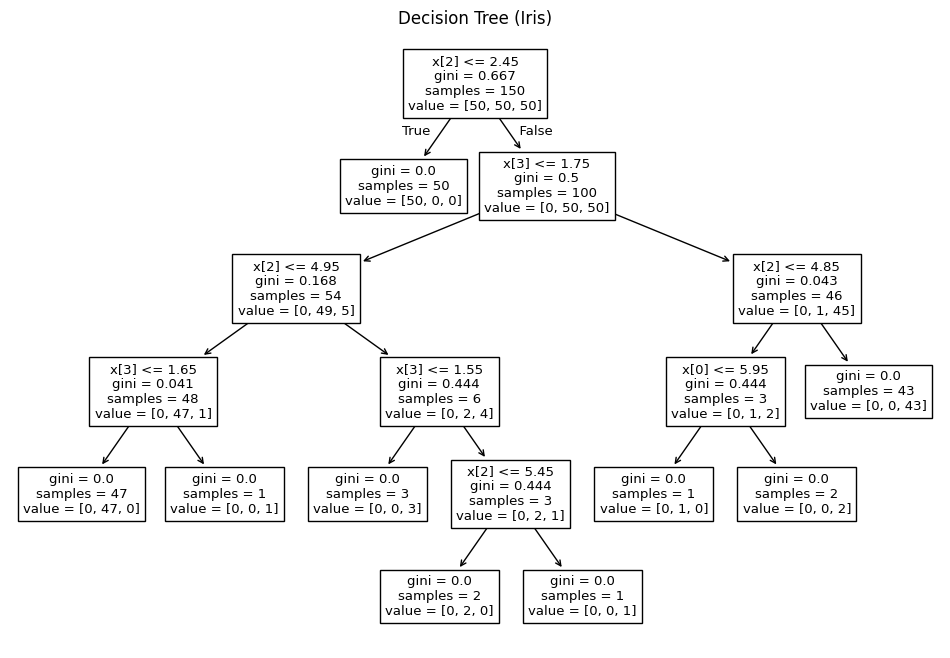

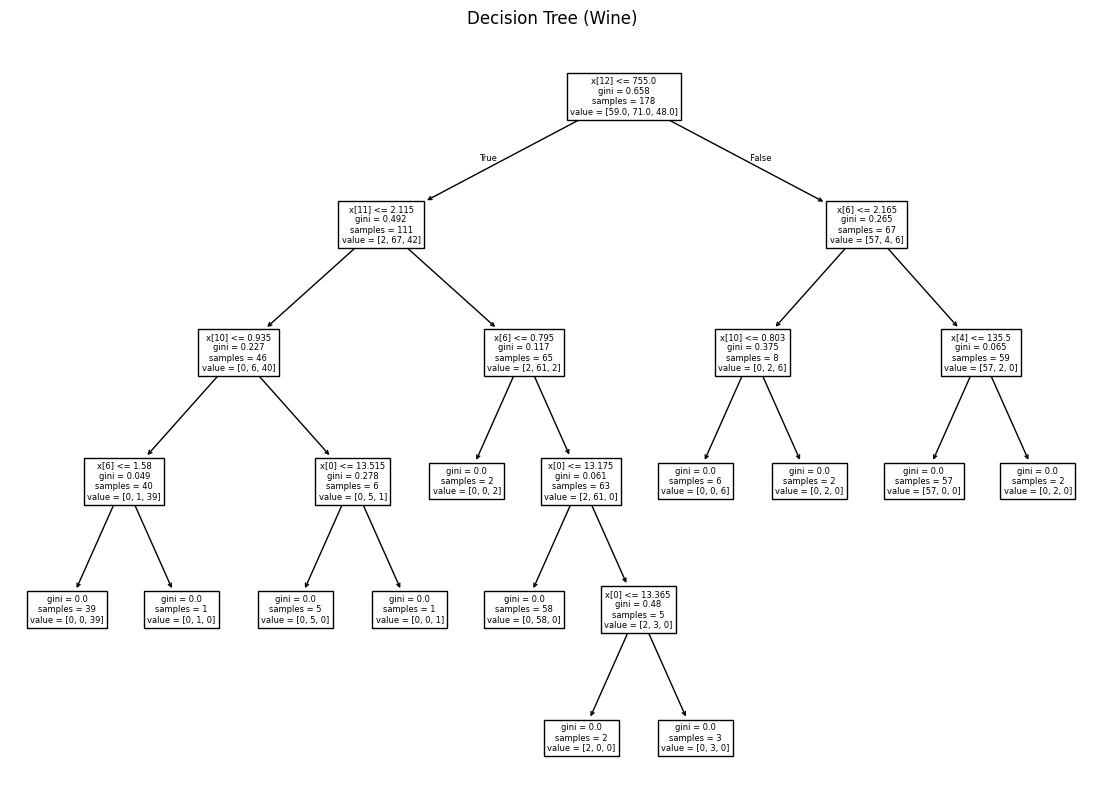

In [20]:
# Visualize Decision Tree structures for Iris and Wine
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train a shallow tree for readability (on original features)
dt_iris = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_iris.fit(X1, y1)

plt.figure(figsize=(12, 8))
plot_tree(dt_iris)
plt.title("Decision Tree (Iris)")
plt.show()

dt_wine = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_wine.fit(X2, y2)

plt.figure(figsize=(14, 10))
plot_tree(dt_wine)
plt.title("Decision Tree (Wine)")
plt.show()